## . 'Social_Network_Ads'

Objectif

L'objectif est de prédire la variable binaire Purchased en fonction des variables explicatives Age et EstimatedSalary. Bien que Gender soit une variable catégorique, elle peut être incluse après encodage (par exemple, via One-Hot Encoding)

 

    User ID : C'est un identifiant unique attribué à chaque utilisateur. Il est utilisé pour différencier les utilisateurs dans l'ensemble de données. Ce n'est pas une variable utilisée pour prédire la cible, mais simplement un identifiant.

    Gender : Cette variable catégorique indique le sexe de l'utilisateur. Elle peut prendre deux valeurs : Male (Homme) ou Female (Femme). Elle est utilisée pour comprendre si le sexe a un impact sur la probabilité qu'un utilisateur achète un produit.

    Age : Il s'agit de l'âge de l'utilisateur. Cette variable numérique continue représente l'âge exact de chaque individu et peut être utilisée pour analyser comment l'âge influence la décision d'achat.

    EstimatedSalary : Cette variable représente le salaire estimé de l'utilisateur. Elle est également numérique et continue. Un salaire plus élevé pourrait potentiellement être lié à un comportement d'achat différent par rapport à un salaire plus bas.

    Purchased : Il s'agit de la variable cible dans ce jeu de données. Elle est binaire (0 ou 1) : 1 indique que l'utilisateur a acheté le produit après avoir vu l'annonce, et 0 signifie qu'il ne l'a pas acheté. C'est cette variable que l'on cherche à prédire à l'aide des autres variables.

Utilisation en machine learning

Ce jeu de données est couramment utilisé pour :

    Appliquer des modèles de classification binaire tels que la régression logistique, SVM, KNN, arbres de décision, etc.

    Pratiquer la prétraitement des données, y compris l'encodage des variables catégoriques, la normalisation des données et la division en ensembles d'entraînement et de test.

    Évaluer les performances des modèles à l'aide de métriques comme la précision, le rappel, la courbe ROC, etc.

##  Importation des bibliotheques :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


##  chargement du data :

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')


In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


##  Exploration des données :

In [4]:
# # afficher les dimensions du dataset :
df.shape

(400, 5)

In [5]:
# afficher les statistiques des colonnes numeriques :
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# afficher les Types de variables et valeurs manquantes :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# liste des colonnes catégorielles et numériques
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nVariables catégorielles :", list(cat_cols))
print("Variables numériques :", list(num_cols))



Variables catégorielles : ['Gender']
Variables numériques : ['User ID', 'Age', 'EstimatedSalary', 'Purchased']


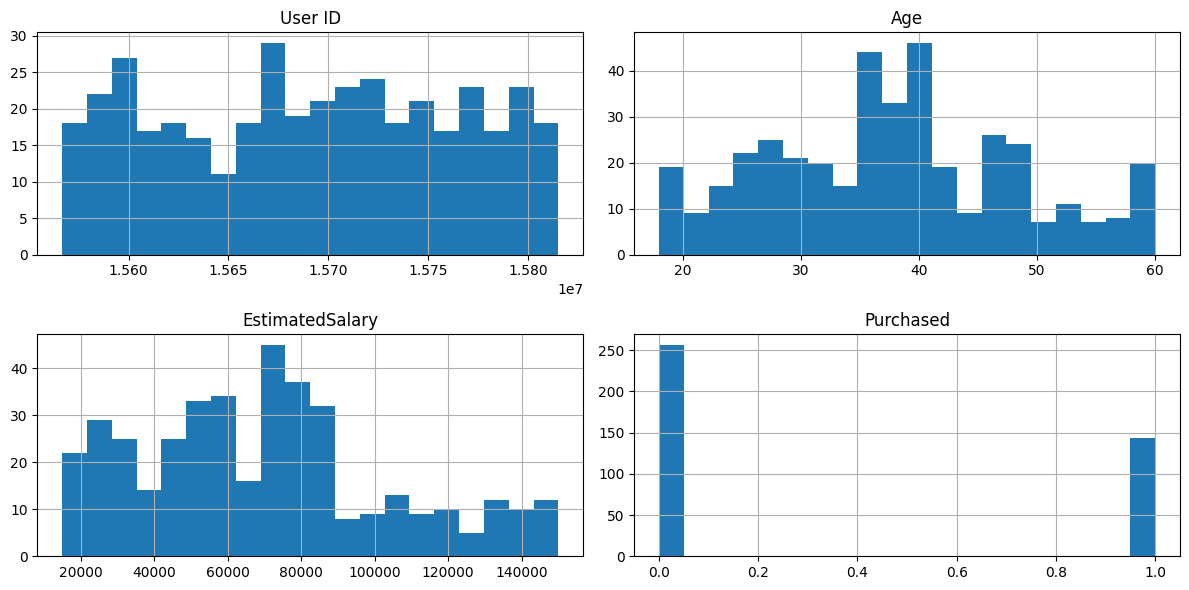

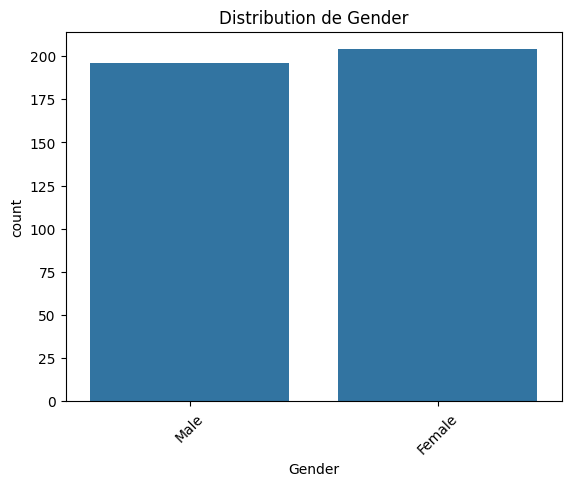

In [8]:
# Histogrammes pour les scores
df[num_cols].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Comptage des valeurs pour les colonnes catégorielles
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"Distribution de {col}")
    plt.show()


 ## Prétraitement des donné :

In [9]:
# gesation des valeurs maquantes :
print(df.isnull().sum())
print("Valeurs manquantes :")

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Valeurs manquantes :


In [10]:
# suprimer les colonne unitile : 
df = df.drop("User ID", axis=1)

In [11]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [12]:
# encodage des variable categoriales : 
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [13]:
print(df.head())

   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0


In [14]:
# Séparation des variables explicatives et de la cible :
X = df[["Gender", "Age", "EstimatedSalary"]]
y = df["Purchased"]

In [15]:
# Division des données en ensemble d'entraînement et de test :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Normalisation des données :
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  Création et entraînement du modèle de régression logistique :

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.8875

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80


Matrice de confusion:
 [[50  2]
 [ 7 21]]


In [20]:
from sklearn.model_selection import cross_val_score, KFold
kf= KFold(n_splits=5, shuffle=True, random_state=42)
scores= cross_val_score(model,X,y,cv=kf)
print(f"scores de validation croisee: {scores}")
print(f"score moyen: {scores.mean(): 2f}")

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

scores de validation croisee: [0.8875 0.85   0.8625 0.7875 0.8375]
score moyen:  0.845000


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


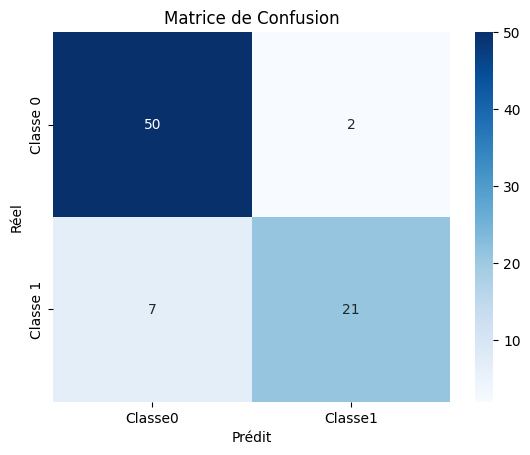

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

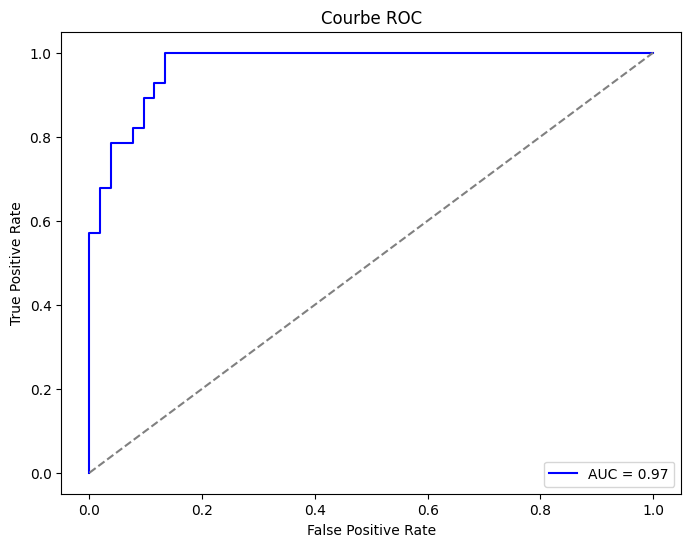

In [22]:
from sklearn.metrics import roc_curve, auc


# Calcul de la courbe ROC
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred_knn= knn.predict(X_test)

In [25]:
accuracy_knn= accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.925

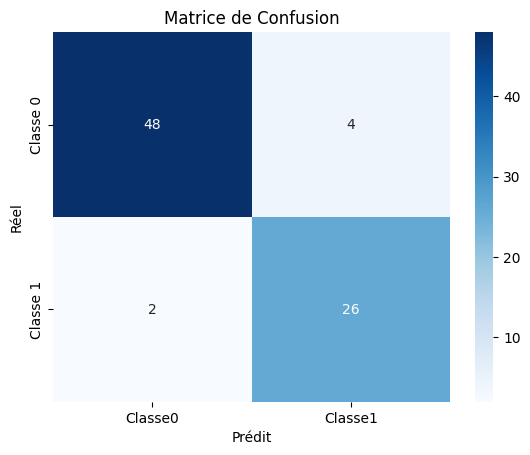

In [26]:
confu_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

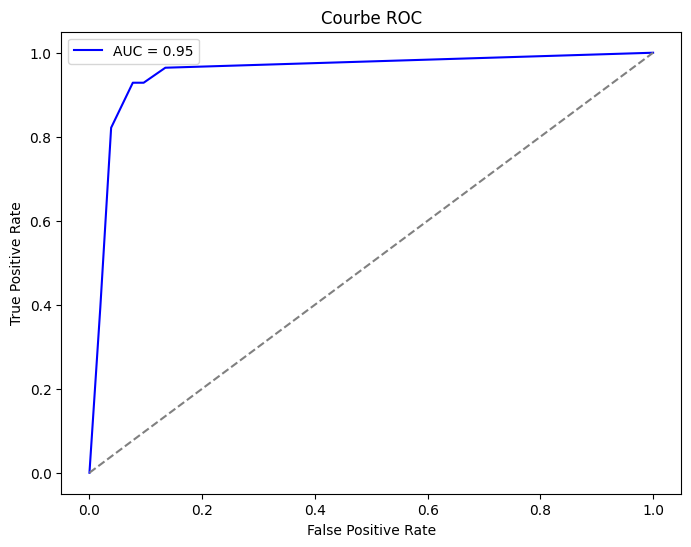

In [27]:
# Calcul de la courbe ROC
y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Définition du modèle d'arbre de décision
tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
tree.fit(X_train, y_train)

print("Modèle d'Arbre de Décision entraîné avec succès.")

Modèle d'Arbre de Décision entraîné avec succès.


In [29]:
y_pred_tree= tree.predict(X_test)
accuracy_TREE= accuracy_score(y_test, y_pred_tree)
accuracy_TREE

0.9125

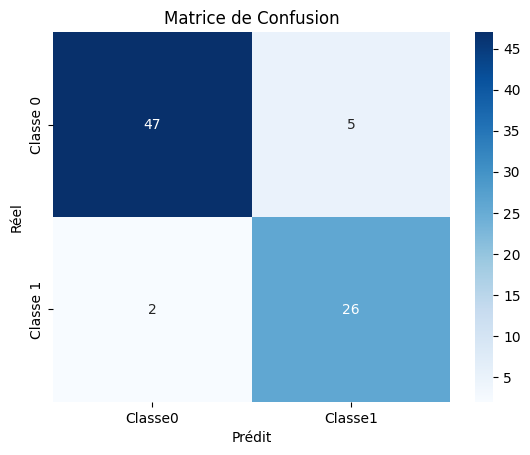

In [30]:
confus_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(confus_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

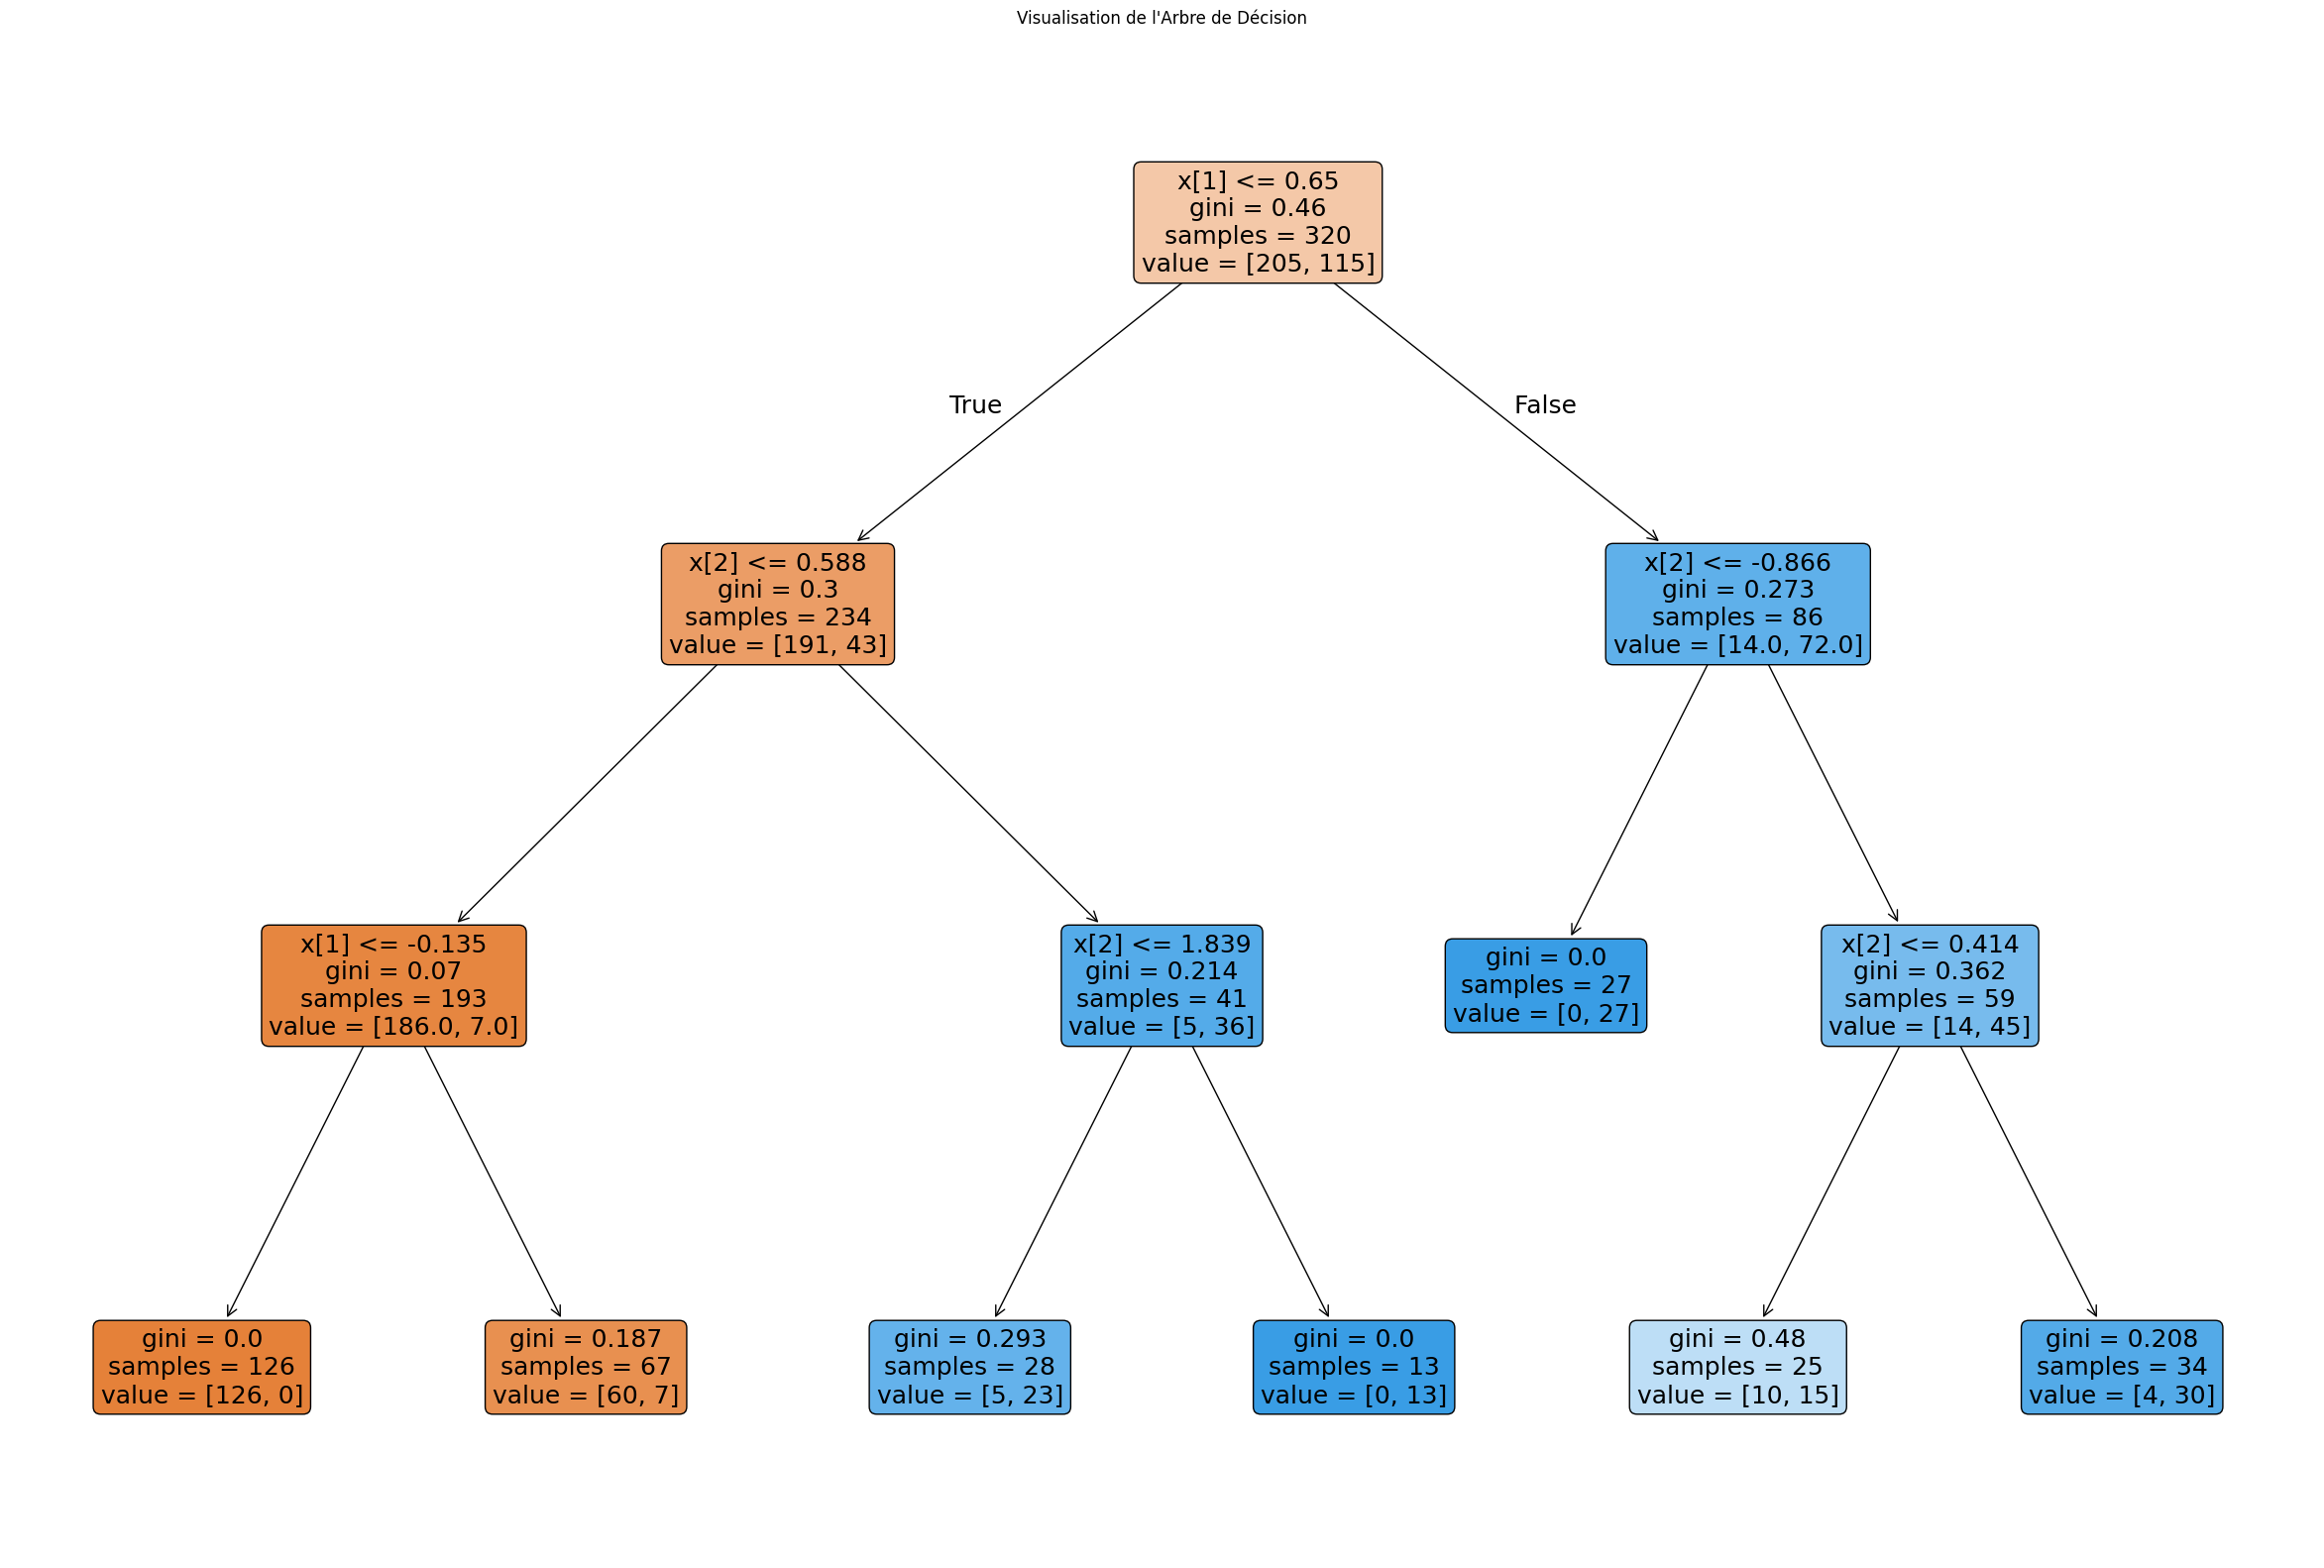

In [31]:
plt.figure(figsize=(30, 20))
plot_tree(
    tree,
    filled=True,
    rounded=True,
    fontsize=18
)
plt.title("Visualisation de l'Arbre de Décision")
plt.show()

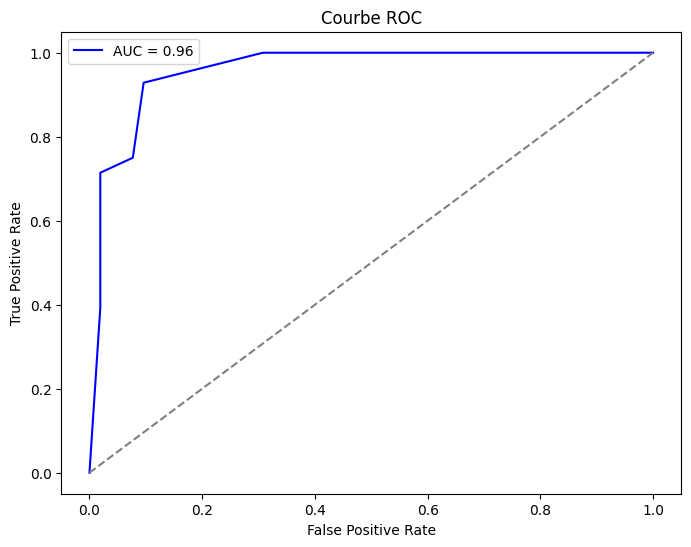

In [32]:
# Calcul de la courbe ROC
y_scores = tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## SVM

In [33]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf') 
svc_model.fit(X_train, y_train)

SVC()

In [34]:
y_pred_svc = svc_model.predict(X_test)

In [35]:
accuracy_svc= accuracy_score(y_test, y_pred_svc)
accuracy_svc

0.925

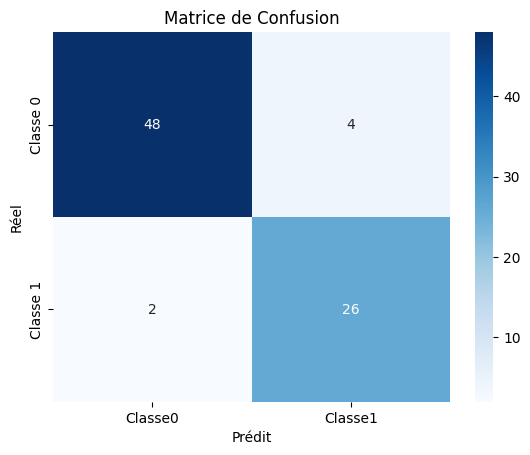

In [36]:
confusi_matrix = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(confusi_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

In [37]:
from sklearn.svm import SVC

svc_model = SVC(probability=True)  # <== active predict_proba
svc_model.fit(X_train, y_train)

SVC(probability=True)

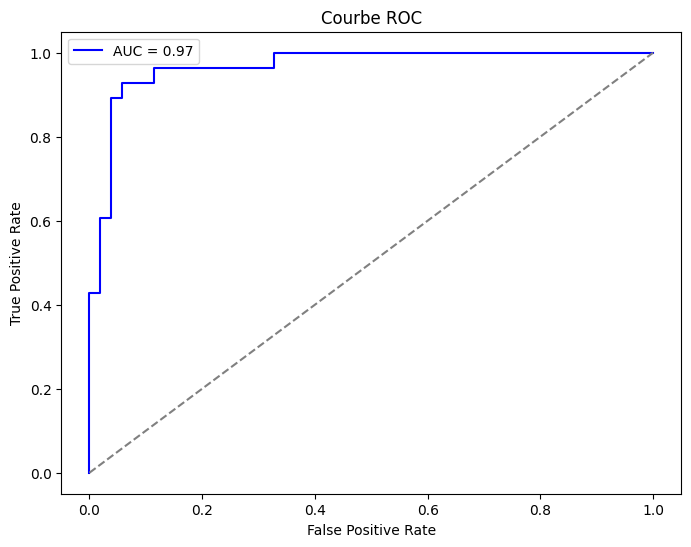

In [38]:
# Calcul de la courbe ROC
y_scores = svc_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## random forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_predr = rf.predict(X_test)
accuracyr = accuracy_score(y_test, y_predr)
print(f'Accuracy du model RF : {accuracyr: .2f}')

Accuracy du model RF :  0.89


In [41]:
from sklearn.metrics import classification_report
print('Rapport de classification: ')
print(classification_report(y_test, y_predr, target_names=[str(cls) for cls in rf.classes_]))


Rapport de classification: 
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



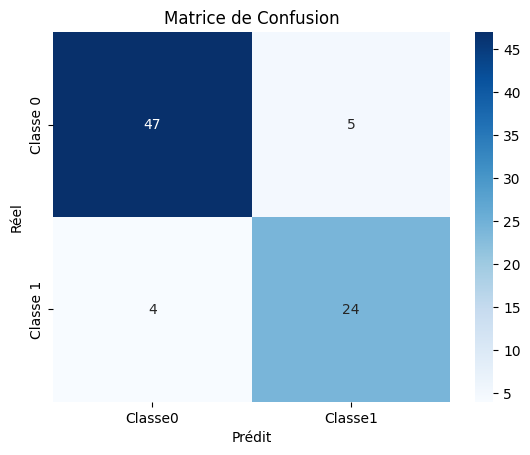

In [42]:
confusi_matrix = confusion_matrix(y_test, y_predr)
sns.heatmap(confusi_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe0', 'Classe1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

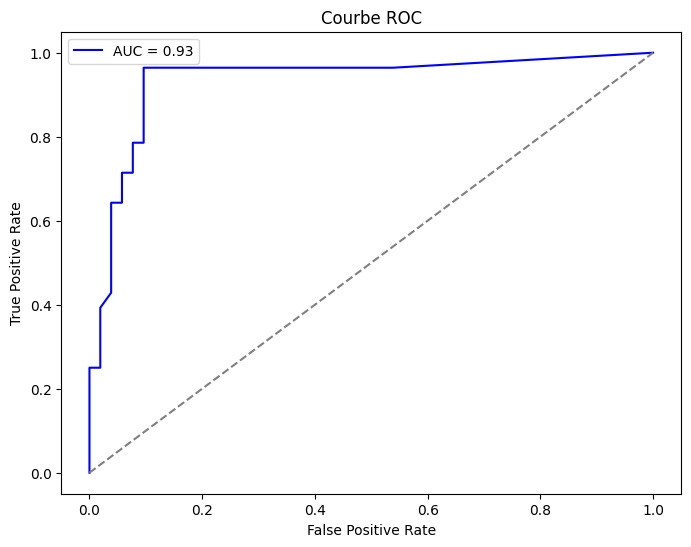

In [43]:
# Calcul de la courbe ROC
y_scores = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend()
plt.show()

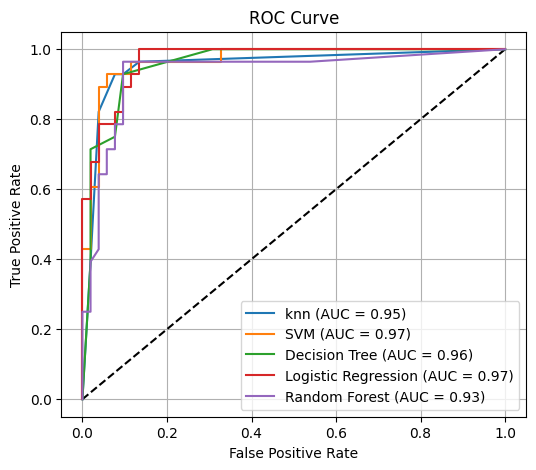

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(model, X_test, y_test, title):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Affichage ROC
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], "k--")
plot_roc(knn, X_test, y_test, "knn")
plot_roc(svc_model, X_test, y_test, "SVM")
plot_roc(tree, X_test, y_test, "Decision Tree")
plot_roc(model, X_test, y_test, "Logistic Regression")
plot_roc(rf, X_test, y_test, "Random Forest")
plt.grid()
plt.show()

In [45]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(X_train, y_train)


SVC(probability=True)

In [46]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']